# Handelsbanken case:
## Data analys över stängda kontor

Explaination on the case, purpose, methodology, models, limitations etc

disregarding location on higher resolution than municipality level, in order to simplify the models.



# Mount the Drive where data files are stored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Importing files and extracting the data using pandas

In [ ]:
import pandas as pd

open_path = "/content/drive/MyDrive/Handelsbanken/i-case_office_open.csv"
closed_path = "/content/drive/MyDrive/Handelsbanken/i-case_office_closed.csv"
pop_path = "/content/drive/MyDrive/Handelsbanken/municipalities_population_raw.csv"
grp_path = "/content/drive/MyDrive/Handelsbanken/municipalities_grp_raw.csv"

open = pd.read_csv(open_path)
closed = pd.read_csv(closed_path)
pop = pd.read_csv(pop_path)
grp = pd.read_csv(grp_path)

print(open)

          Name  Year Municipality                          Address   Latitude  \
0     Alingsås  2015     Alingsås   Kungsgatan 24, 44130, Alingsås  57.930464   
1     Alingsås  2016     Alingsås   Kungsgatan 24, 44130, Alingsås  57.930464   
2     Alingsås  2017     Alingsås   Kungsgatan 24, 44130, Alingsås  57.930464   
3     Alingsås  2018     Alingsås   Kungsgatan 24, 44130, Alingsås  57.930464   
4     Alingsås  2019     Alingsås   Kungsgatan 24, 44130, Alingsås  57.930464   
..         ...   ...          ...                              ...        ...   
965  Östhammar  2015    Östhammar  Rådhusgatan 1, 74231, Östhammar  60.258871   
966  Östhammar  2016    Östhammar  Rådhusgatan 1, 74231, Östhammar  60.258871   
967  Östhammar  2017    Östhammar  Rådhusgatan 1, 74231, Östhammar  60.258871   
968  Östhammar  2018    Östhammar  Rådhusgatan 1, 74231, Östhammar  60.258871   
969  Östhammar  2019    Östhammar  Rådhusgatan 1, 74231, Östhammar  60.258871   

     Longitude  Customers  

#Data preprocessing
 Prepering data for analysis

In [ ]:
# Rename the 'name' column to 'Municipality' in 'pop' and 'grp'
pop = pop.rename(columns={'Name': 'Municipality'})
grp = grp.rename(columns={'Name': 'Municipality'})

#Drop 'Code' from 'pop' and 'grp'
pop = pop.drop(columns = ['Code'])
grp = grp.drop(columns = ['Code'])

#Drop 'Latitude', 'Longitude' and 'Address' from 'open' and 'closed'
open = open.drop(columns = ['Latitude', 'Longitude', 'Address'])
closed = closed.drop(columns = ['Latitude', 'Longitude', 'Address'])

# Rename the years in pop to 'pop [year]' and in grp to ...
pop = pop.rename(columns={col: 'pop ' + col for col in pop.columns if col != 'Municipality'})
grp = grp.rename(columns={col: 'grp ' + col for col in grp.columns if col != 'Municipality'})

#Adding pop and grp data into open and closed data
open = open.merge(pop, on='Municipality', how='inner')
open = open.merge(grp, on='Municipality', how='inner')
closed = closed.merge(pop, on='Municipality', how='inner')
closed = closed.merge(grp, on='Municipality', how='inner')

#Add label open offices as 1 and closed as 0
open['Open'] = 0
closed['Open'] = 1

all = pd.concat([open, closed], axis=0)
all = all.reset_index(drop=True)

print(all)

                       Name  Year Municipality  Customers  Avg. Customer Age  \
0                  Alingsås  2015     Alingsås       6462          33.922961   
1                  Alingsås  2016     Alingsås       6571          33.922961   
2                  Alingsås  2017     Alingsås       6627          33.922961   
3                  Alingsås  2018     Alingsås       6656          33.922961   
4                  Alingsås  2019     Alingsås       6696          33.922961   
..                      ...   ...          ...        ...                ...   
975                   Kumla  2016        Kumla       1515          37.405519   
976                 Leksand  2016      Leksand       1580          39.809033   
977        Uppsala Luthagen  2016      Uppsala       8998          45.115358   
978              Vilhelmina  2016   Vilhelmina        878          42.634378   
979  Örebro Drottningparken  2016       Örebro       5420          40.787645   

     Students      Revenues         Cos

# Feature engineering (skipping for now)




In [ ]:
#skip for now

#offices/municipality
open['Office/muni'] = open.groupby('Municipality')['Name'].transform('count')/5

#print(OM)

#offices/population
all['pop/office'] = all['pop 2016'] / all['Office/muni']

#customer/population
all['customer/pop/office'] = all['Customers'] / all['pop/office']

#cost/costumer
all['cost/customer'] = all['Costs'] / all['Customers']


#revenue/customer
all['cost/customer'] = all['Costs'] / all['Customers']


#total grp
all['total GRP'] = (all['grp 2016'] * all['pop 2016'])


#total grp/office
all['total GRP/office'] = (all['grp 2016'] * all['Customers'])


#YoY pop growth?



#YoY grp growth?



#YoY total grp growth?

printframe = open.loc[:, ['Municipality', 'Office/muni']]
pd.set_option('display.max_rows', None)
print(printframe.drop_duplicates())


       Municipality  Office/muni
0          Alingsås          1.0
5          Göteborg         10.0
55        Stockholm         27.0
190          Arboga          1.0
195           Solna          2.0
205           Boden          1.0
210       Bollebygd          1.0
215         Bollnäs          1.0
220        Borlänge          1.0
225           Borås          1.0
230            Håbo          1.0
235          Båstad          1.0
240        Danderyd          2.0
250        Ovanåker          1.0
255           Ekerö          1.0
260        Enköping          1.0
265      Eskilstuna          1.0
270        Fagersta          1.0
275      Falkenberg          1.0
280       Falköping          1.0
285           Falun          1.0
290           Malmö          5.0
315        Gislaved          1.0
320         Gotland          1.0
325       Gällivare          1.0
330           Gävle          1.0
335       Norrtälje          2.0
345        Halmstad          1.0
350         Haninge          1.0
355       

#Visual Analysis with pairplot

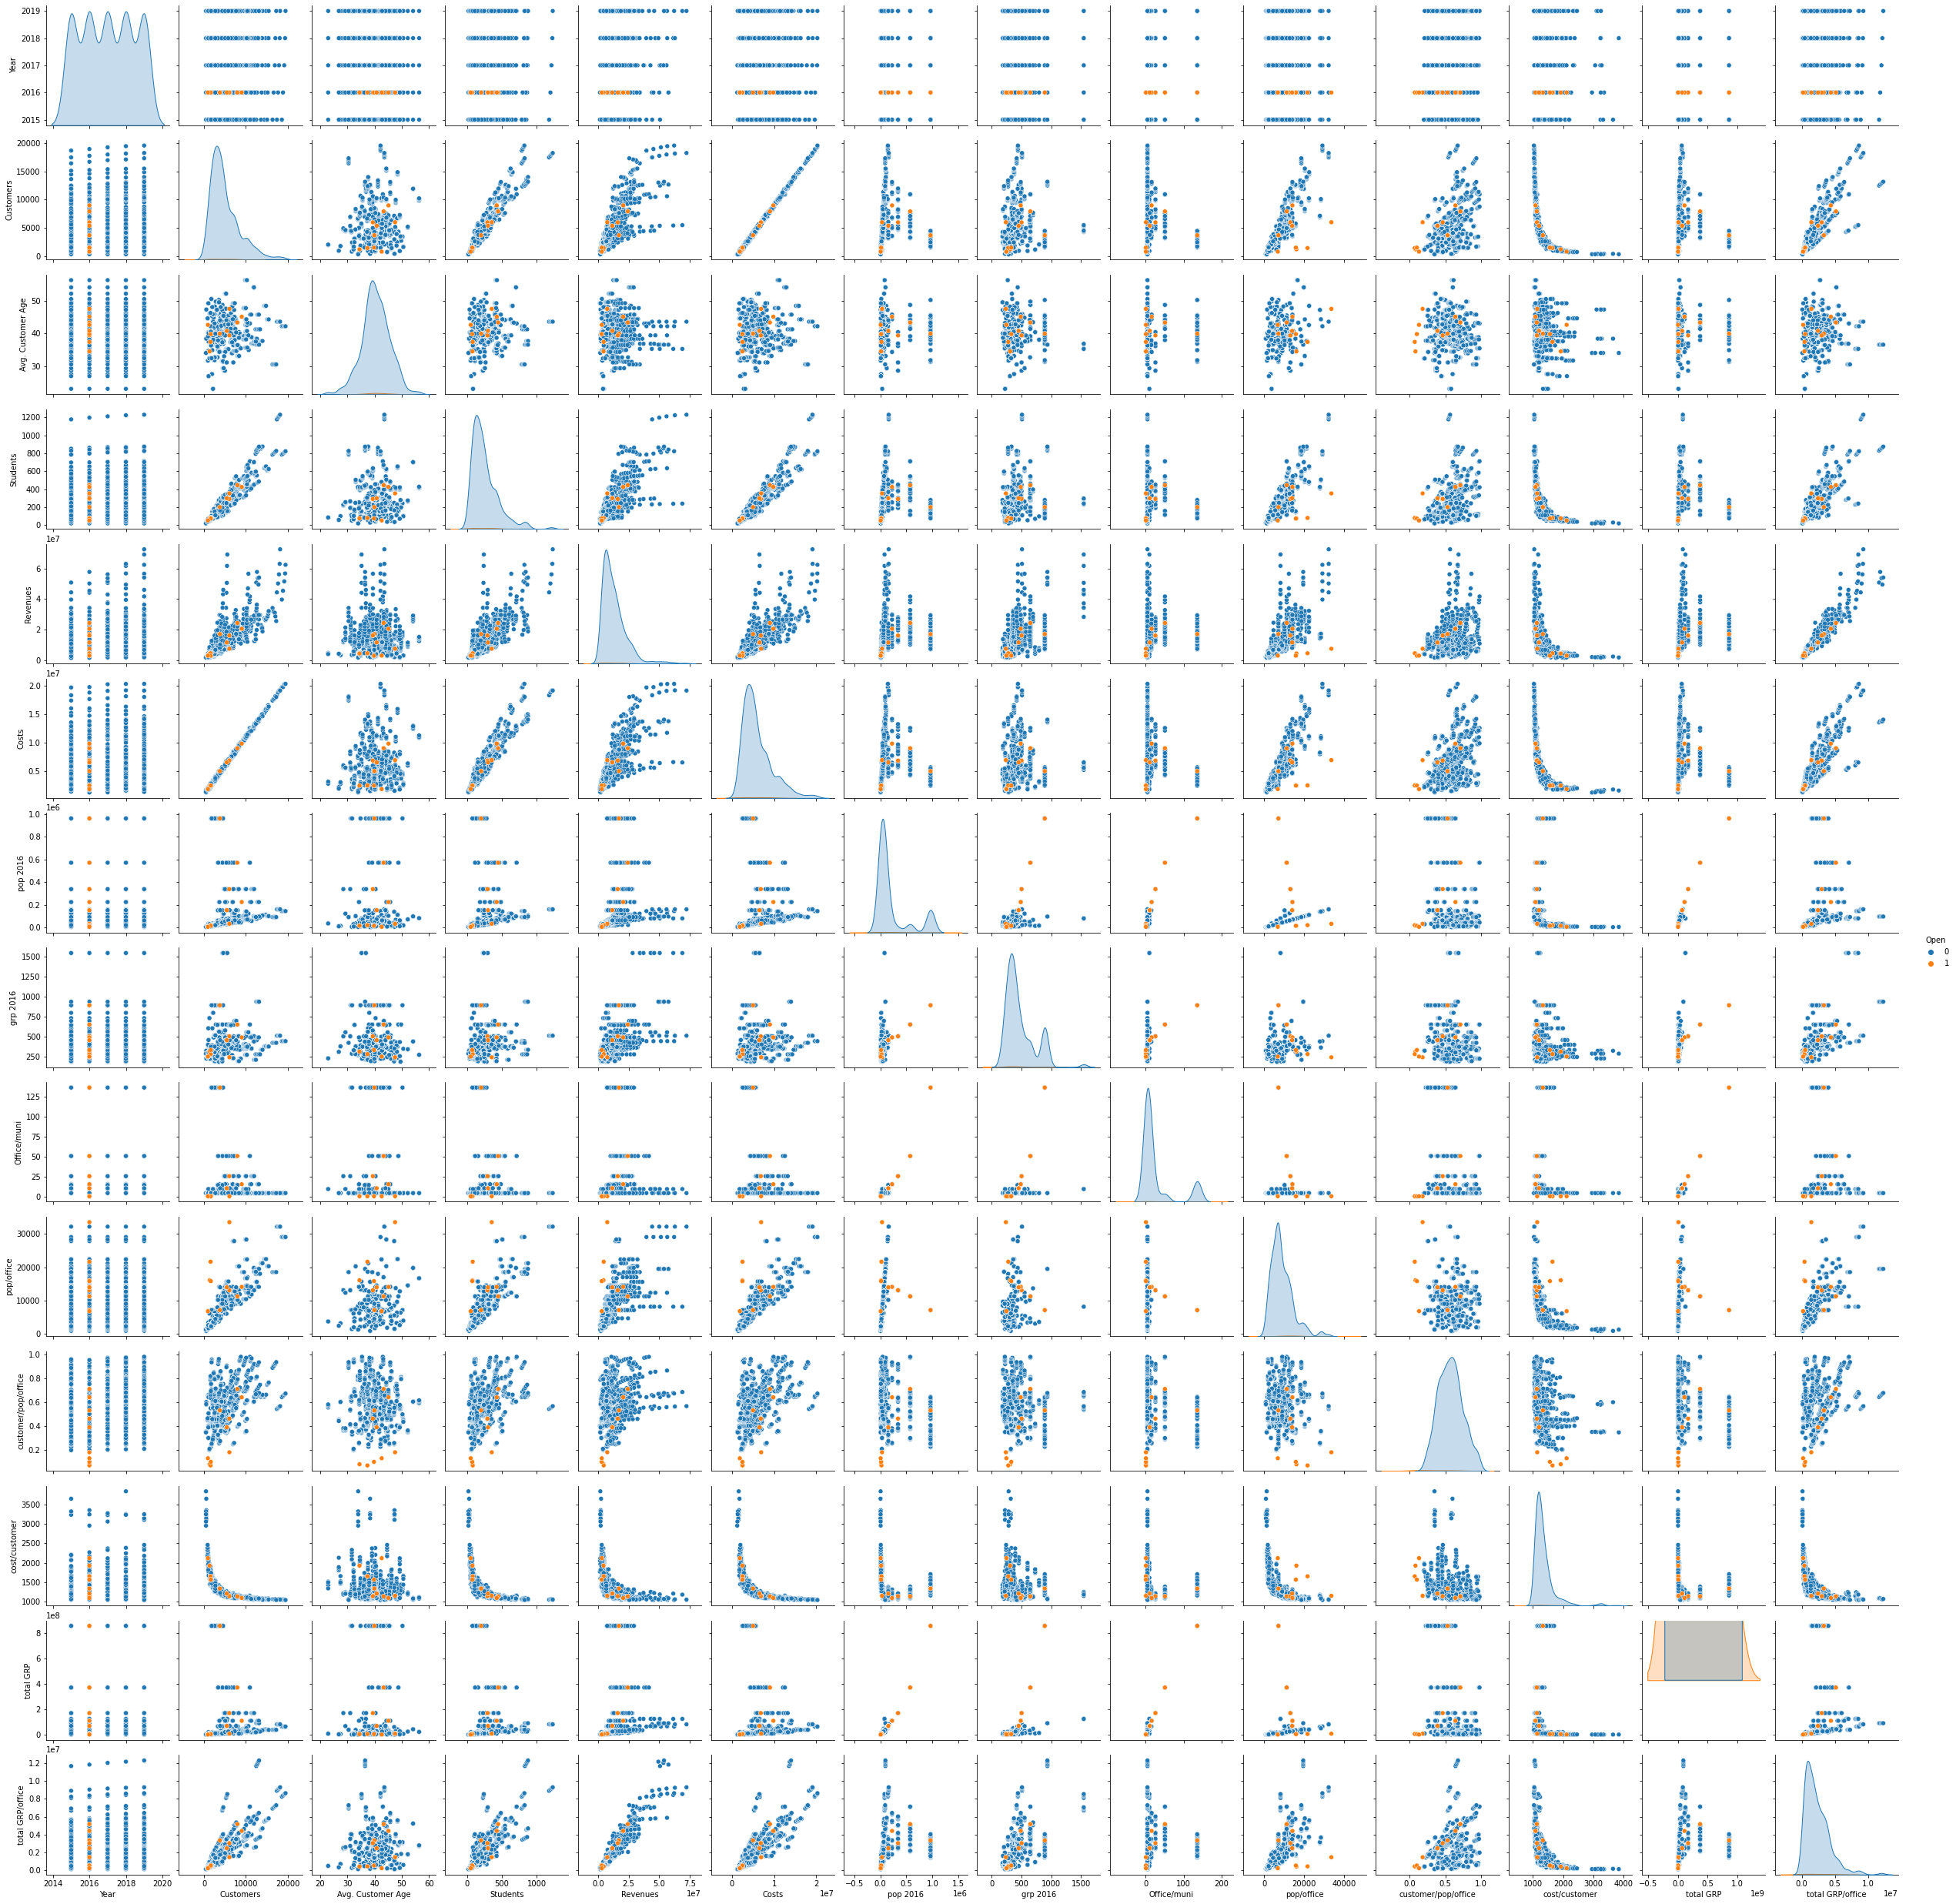

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter unwanted columns
all_filtered = all[all['Year'].between(2016, 2016)]
all_filtered = all.drop(columns = ['pop 2015', 'pop 2017', 'pop 2018','pop 2019','grp 2015','grp 2017','grp 2018','grp 2019'])

# Create the pairplot, excluding unwanted columns
sns.pairplot(data=all_filtered, hue='Open')


# Show the plot
plt.show()

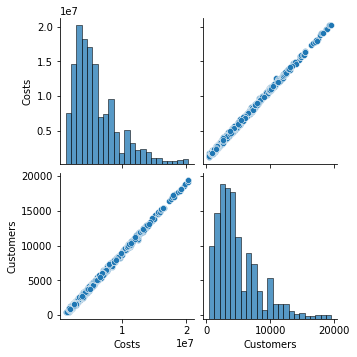

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the pairplot, excluding unwanted columns
sns.pairplot(all, vars=['Costs', 'Customers'])

# Show the plot
plt.show()

#Splitting of training data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


# Filter data for only 2016
offices_2016 = all[all['Year'].between(2016, 2016)]
offices_2016 = offices_2016.drop(columns = ['pop 2015', 'pop 2017', 'pop 2018','pop 2019','grp 2015','grp 2017','grp 2018','grp 2019'])

#Removing data in which we see no reasonable correlation or use
offices_2016 = offices_2016.drop(columns = ['Students', 'Year', 'Municipality', 'Name'])



#Train-test split
X = offices_2016.drop(['Open'], axis=1) # features
y = offices_2016['Open'] # target
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)


# check if the number of samples in X and y match
#if X.shape[0] != y.shape[0]:
print(X.shape)
print(y.shape)
    #raise ValueError("The number of samples in X and y do not match")


(204, 12)
(204,)


#Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score

class_weights = {1: 1, 0: 194/10}

# Train a Random Forest Classifier on the training data
clf = RandomForestClassifier(
    n_estimators= 200,
    bootstrap=False,
    class_weight = class_weights,
)

clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's performance using accuracy, F1 score, and recall
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# compute feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns)

# sort the importances from highest to lowest
importances_sorted = importances.sort_values(ascending=False)

# print the sorted feature importances
print(importances_sorted)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Recall:", recall)


customer/pop/office    0.229934
Office/muni            0.202372
Revenues               0.088501
cost/customer          0.077881
Costs                  0.069873
Customers              0.068344
total GRP/office       0.064403
pop/office             0.060033
Avg. Customer Age      0.054496
total GRP              0.035126
pop 2016               0.026470
grp 2016               0.022567
dtype: float64
Accuracy: 0.9512195121951219
F1 Score: 0.0
Recall: 0.0


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Define the classifier
test = BaggingClassifier(base_estimator=RandomForestClassifier(),

                                 random_state=42)

# Train the model using 10-fold cross validation
scores = cross_val_score(test, X, y, cv=10, scoring='f1_macro')

# Print the mean F1 score and classification report
print("Mean F1 Score:", scores.mean())
y_pred = cross_val_predict(test, X, y, cv=10)
print(classification_report(y, y_pred))

KeyboardInterrupt: ignored

In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Select a machine learning algorithm
model = LogisticRegression()

# Step 6: Train your model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Step 7: Interpret the results
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion_mat)
print("Classification report:\n", report)

Accuracy: 0.9512195121951219
Confusion matrix:
 [[39  0]
 [ 2  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       0.00      0.00      0.00         2

    accuracy                           0.95        41
   macro avg       0.48      0.50      0.49        41
weighted avg       0.90      0.95      0.93        41



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

# Restart button


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
file = open("Streamaffären dataset VT2023 Final.csv", "r")

fileLines = file.readlines()

days: list[dict] = []

for line in fileLines[1:]:
    lineSeparated = line.split(";")
    days.append({
    "datum": lineSeparated[0],
    "dokumentär": float(lineSeparated[1].replace(",", ".")),
    "komedi": float(lineSeparated[2].replace(",", ".")),
    "romantik": float(lineSeparated[3].replace(",", ".")),
    "crime": float(lineSeparated[4].replace(",", ".")),
    "skräck": float(lineSeparated[5].replace(",", ".")),
    "övrigt": float(lineSeparated[6].replace(",", "."))
})

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from matplotlib import pyplot as plt

viewerDF = pd.DataFrame(days)

all_x = viewerDF.iloc[0:59, 1:4].join(viewerDF.iloc[0:59, 5:7])
all_y = viewerDF.iloc[1:60, 4]

x_train, x_test, y_train, y_test = train_test_split(all_x, all_y)


clf = svm.LinearSVR()

clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))

linearSvr = clf.predict(all_x.iloc[58:59, :])

clf = svm.NuSVR()

clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))

nuSvr = clf.predict(all_x.iloc[58:59, :])

clf = svm.SVR()

clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))

svr = clf.predict(all_x.iloc[58:59, :])

plt.plot(all_y[50:60])
plt.plot([59, 60], [all_y[59], nuSvr[0]])
plt.plot([59, 60], [all_y[59], svr[0]])
plt.plot([59, 60], [all_y[59], linearSvr[0]])
plt.scatter([60, 60, 60], [nuSvr[0], linearSvr[0], svr[0]])
plt.legend(["Historisk data", "Nu-Svr", "Vanlig Svr", "Linjär Svr"])
plt.title("Tillämpning av machine learning för prediktion")
plt.ylabel("Genomsnittliga tittare crime")
plt.xlabel("Tidsstämpel (Månader sedan mätningens start)")